In [1]:
import sys 
sys.path.append('..')

In [2]:
import numpy as np
import os
from lib.pdb import get_atom_id_from_pdb, get_all_pdb_names
from lib.plot import plot_histogram
import matplotlib.pyplot as plt

In [3]:
LIGAND_VOXEL_NUM = 6
WATER_PDB_DIR = "/home/ito/research/data/ghecom/labeled_water/"
# WATER_PDB_DIR = f"/home/ito/research/data/LIGAND_POCKET_VOXEL_NUM_{LIGAND_VOXEL_NUM}/labeled_water/"

In [4]:
def count_water_number(water_pdb_path):
    ids = get_atom_id_from_pdb(water_pdb_path)
    return len(ids)

def count_dis_water_nums(water_pdb_dir, pdb_name):
    displaceable_water_num = count_water_number(os.path.join(water_pdb_dir, 'displaceable/', pdb_name, f'pred_O_placed_{pdb_name}_3.0_surface_grid.pdb'))
    return displaceable_water_num

def count_non_dis_water_nums(water_pdb_dir, pdb_name):
    non_displaceable_water_num = count_water_number(os.path.join(water_pdb_dir, 'non_displaceable/', pdb_name, f'pred_O_placed_{pdb_name}_3.0_surface_grid.pdb'))
    return non_displaceable_water_num

In [5]:
pdb_names = get_all_pdb_names()
displaceable_water_nums = []
for pdb_name in pdb_names:
    try:
        displaceable_water_num = count_dis_water_nums(WATER_PDB_DIR, pdb_name)
        displaceable_water_nums.append(displaceable_water_num)
    except Exception as e:
        # print(f"Error: {e}")
        continue

In [6]:
non_displaceable_water_nums = []
for pdb_name in pdb_names:
    try:
        non_displaceable_water_num = count_non_dis_water_nums(WATER_PDB_DIR, pdb_name)
        non_displaceable_water_nums.append(non_displaceable_water_num)
        if non_displaceable_water_num == 332:
            print(pdb_name)
    except Exception as e:
        # print(f"Error: {e}")
        continue

In [7]:
max(non_displaceable_water_nums)

46

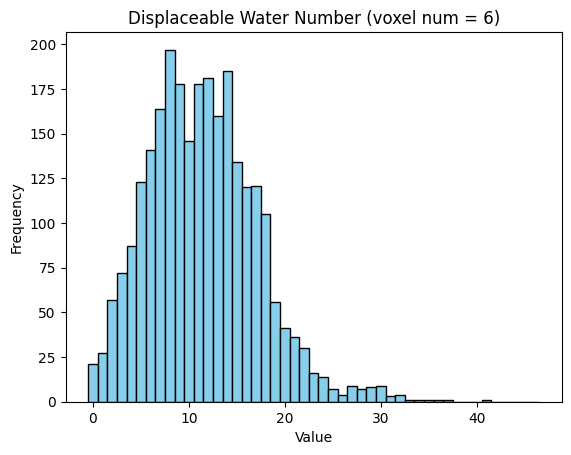

In [8]:
plot_histogram(displaceable_water_nums, non_displaceable_water_nums, f'Displaceable Water Number (voxel num = {LIGAND_VOXEL_NUM})')

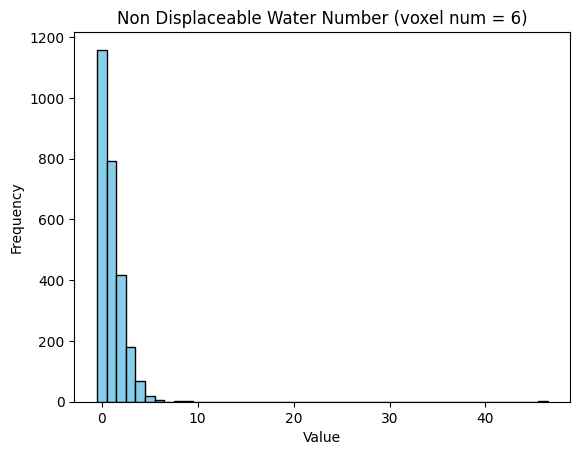

In [9]:
plot_histogram(non_displaceable_water_nums, displaceable_water_nums, f'Non Displaceable Water Number (voxel num = {LIGAND_VOXEL_NUM})')

In [10]:
displaceable_water_total = sum(displaceable_water_nums)
non_displaceable_water_total = sum(non_displaceable_water_nums)
print(f'displaceable_water_total: {displaceable_water_total}')
print(f'non_displaceable_water_total: {non_displaceable_water_total}')
# 比率を表示
total = displaceable_water_total + non_displaceable_water_total
print(f'dis_ratio: {displaceable_water_total / total}')
print(f'non_dis_ratio: {non_displaceable_water_total / total}')

print('dis_ave:', displaceable_water_total/len(displaceable_water_nums))
print('non_dis_ave:', non_displaceable_water_total/len(non_displaceable_water_nums))

# 標準偏差を求める
dis_std = np.std(displaceable_water_nums)
non_dis_std = np.std(non_displaceable_water_nums)
print('dis_std:', dis_std)
print('non_dis_std:', non_dis_std)

print('total:', total)

displaceable_water_total: 30290
non_displaceable_water_total: 2646
dis_ratio: 0.9196623755161525
non_dis_ratio: 0.08033762448384746
dis_ave: 11.443143180959577
non_dis_ave: 0.9996222138269739
dis_std: 5.718070727791816
non_dis_std: 1.4478726917098943
total: 32936
